In [411]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [412]:
lamb = 1.0/12000

mic = 1.0/60.0
#mic = 0

#mip = 1/(3*30*24*60)
mip = 0

simulation_end = 65*24*60

deltaT = 1.0

In [413]:
#matrix = [[1-3*lamb,2*lamb,lamb,0],
 #        [mic,1-lamb-mic,0,lamb],
  #       [mip,0,1-2*lamb-mip,2*lamb],
   #      [mic,0,0,1-mic]]

In [414]:
matrix = [
         [1-3*lamb ,mic       ,mip          ,mic],
         [2*lamb   ,1-lamb-mic,0            ,0],
         [lamb     ,0         ,1-2*lamb-mip ,0],
         [0        ,lamb      ,2*lamb       ,1-mic]]

In [415]:
tsim = 0
aux = []
tsims = []
pfs = []
matrix_current = matrix
i = 0
while tsim < simulation_end:
    tsims.append(tsim)
    pfs.append(matrix_current[3][0])
    matrix_current = np.matmul(matrix_current,matrix)
    tsim += deltaT
    i+= 1
    if i == 1000000:
        print(tsim)
        i = 0

In [416]:
df = pd.DataFrame(columns=['tsim','p(f)'])

In [417]:
df['tsim'] = tsims
df['p(f)'] = pfs

In [418]:
df['R(t)'] = 1- df['p(f)']
df['tsim (h)'] = df.tsim/60

Text(0.5,1,'Confiabilidade')

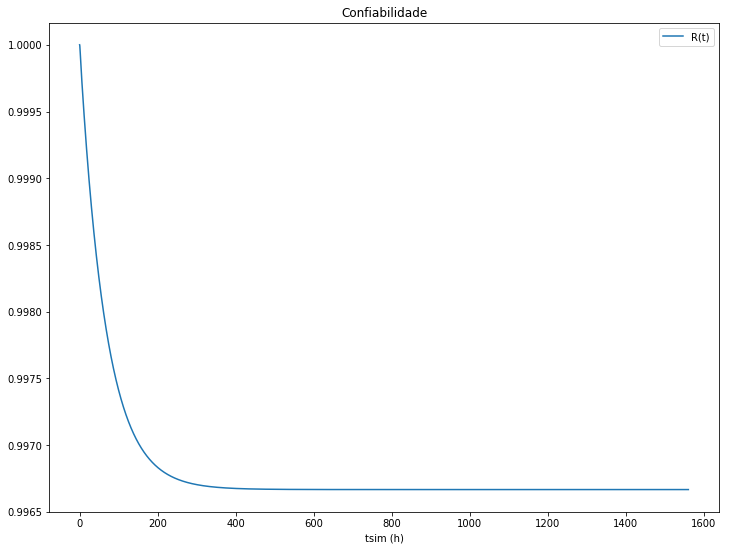

In [419]:
df.plot(x='tsim (h)',y='R(t)',figsize = (12,9))
plt.title('Confiabilidade')

In [378]:
df_conf = df.copy()

In [388]:
df_conf_sem_mip = df.copy()

In [398]:
df_conf_sem_mic = df.copy()

In [410]:
df_disp = df.copy()

In [420]:
df_disp_sem_mip = df.copy()

In [400]:
df_conf.sum()/60

tsim        7.300722e+07
p(f)        1.252166e+03
R(t)        3.078337e+02
tsim (h)    1.216787e+06
Sem up      2.988351e+02
Sem uc      2.352271e+02
dtype: float64

/Users/thicorfon/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


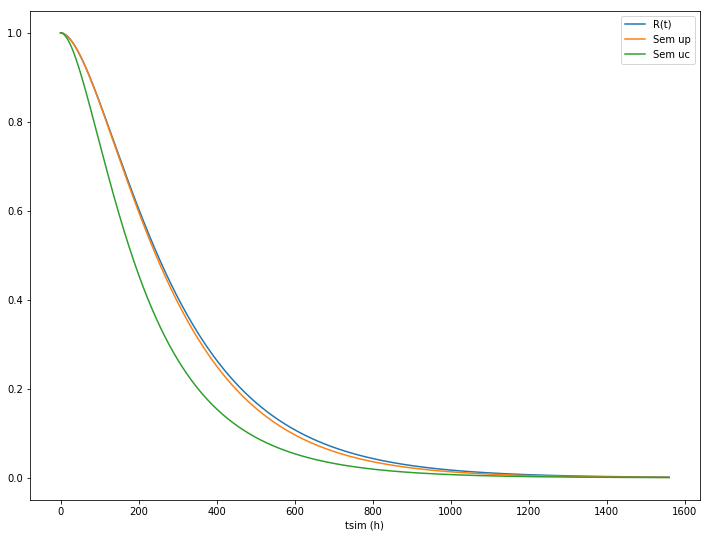

In [399]:
df_conf['Sem up'] = df_conf_sem_mip['R(t)']
df_conf['Sem uc'] = df_conf_sem_mic['R(t)']
df_conf.plot(x='tsim (h)',y=['R(t)','Sem up','Sem uc'],figsize = (12,9))

/Users/thicorfon/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


(0.99, 1.0001666584568794)

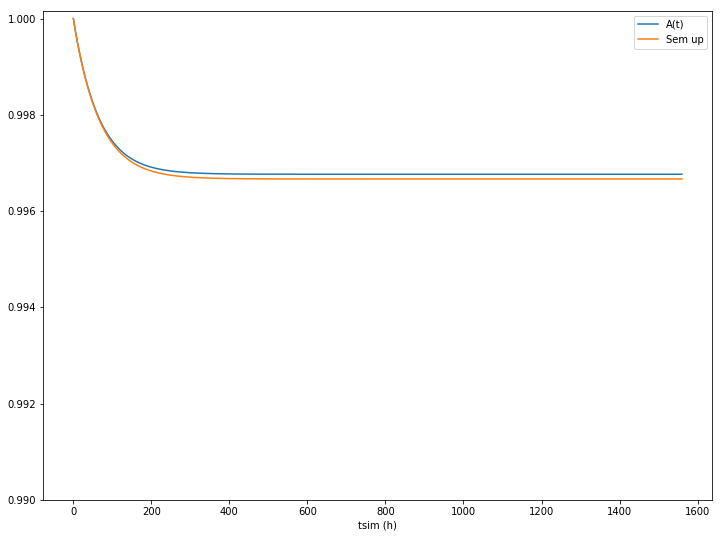

In [421]:
df_disp['Sem up'] = df_disp_sem_mip['R(t)']
df_disp = df_disp.rename(columns={'R(t)':'A(t)'})
df_disp.plot(x='tsim (h)',y=['A(t)','Sem up'],figsize = (12,9))
plt.ylim(ymin=0.99)

In [422]:
df_disp.tail(10)

,tsim,p(f),A(t),tsim (h),Sem up
93590,93590.0,0.003235,0.996765,1559.833333,0.996667
93591,93591.0,0.003235,0.996765,1559.850000,0.996667
93592,93592.0,0.003235,0.996765,1559.866667,0.996667
93593,93593.0,0.003235,0.996765,1559.883333,0.996667
93594,93594.0,0.003235,0.996765,1559.900000,0.996667
93595,93595.0,0.003235,0.996765,1559.916667,0.996667
93596,93596.0,0.003235,0.996765,1559.933333,0.996667
93597,93597.0,0.003235,0.996765,1559.950000,0.996667
93598,93598.0,0.003235,0.996765,1559.966667,0.996667
93599,93599.0,0.003235,0.996765,1559.983333,0.996667
